<h1>Starting with language datas and NLTK</h1>
The goal is to find the two nearest sentences (in a meaning/semantic way) in the articles on the same topic. The method used should also show a difference between the article on a different topic.
<br>The possible tools used to achieve this result are been presented the last session (tokenization, normalization, regular expressions, string distances).Verify if your 3 articles respect the Zipf’s law.
<br>
Here under, you will find some examples of this tools with NLTK.


<h2>Find the two nearest sentences(in a meaning/semantic way) using tokenization, normalization, regex ans string distances

Importation of the library

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import TreebankWordTokenizer
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.metrics import *

Importation of 3 articles :
- 2 Articles about the double currencies in CUBA
- 1 Article about the conflict between Israel and Gaza

In [ ]:
article1 = 'En pleine crise économique et alimentaire, Cuba entame son unification monétaire. Serpent de mer pour le gouvernement cubain depuis une décennie, fusionner les deux monnaies en circulation dans le pays relève d’un véritable défi mais d’une «  nécessité urgente », selon le gouvernement.L’unification des deux monnaies n’a pourtant pas été annoncé officiellement. Mais déjà les Cubains s’inquiètent pour leurs économies et se ruent dans les bureaux de change. Officiellement, 1 CUC (péso cubain convertible) vaut 24 pesos cubains. Mais le CUC s’échange désormais dans la rue contre 23 pesos. Plus personne n’en veut. Et certains commerçants et travailleurs indépendants ne l’acceptent déjà plus. Le peso convertible va disparaître. Mais quand ? Personne n’a la réponse !Ce qui est sûr, c’est que Maritza Kiara attend depuis trois heures pour entrer, comme une cinquantaine de personnes, dans le bureau de change et se débarrasser de ses pesos convertibles. « Je vais changer toutes mes économies, assure-t-elle. Je n’en ai pas beaucoup. Mais il vaut mieux changer maintenant plutôt que de les perdre ! Parce qu’on ne sait pas le taux de change qu’ils vont mettre plus tard. Ils vont peut-être le baisser à 20 pesos donc je préfère changer maintenant à 24 pesos ! »Depuis plusieurs semaines, selon une « radio bemba », cette rumeur qui va très vite à Cuba, le CUC s’échangerait désormais à 20 pesos. Alors les bureaux de change ont été pris d’assaut. Marta Ramirez Moreno est juste devant Maritza dans la queue. « Non, non, on ne sait vraiment rien pour l’instant. Mais ce qui se passe, c’est que les gens parlent et commentent, et on préfère anticiper », confie-t-elle. Les deux femmes anticipent, selon leurs mots, pour ne pas dire qu’elles paniquent à l’idée de perde leurs petites économies. Aucune information n’a pourtant été donnée sur le taux de change. Les Cubains craignent également une inflation, alors que le pays traverse actuellement des difficultés économiques et des pénuries. Mais le gouvernement estime que l’unification monétaire est désormais urgente et servira à la « transparence » de la gestion du pays.'

article2 = 'Le 1er janvier, Cuba célébrera le 61e anniversaire de sa révolution. Si 2019 a été marquée par un événement politique, l’entrée en vigueur d’une nouvelle Constitution, 2020 devrait être une année de réformes économiques avec l’unification des deux monnaies, un chantier proclamé « prioritaire » depuis 2015, mais très délicat à mettre en place. À terme (aucune date n’a été fixée), le CUC, devise alignée sur le dollar qui sert aux échanges dans le tourisme et pour l’achat des biens d’équipement des ménages, doit disparaître. Seul subsistera le vieux peso qu’utilisent les Cubains au quotidien. La monnaie américaine, longtemps bannie (il fallait la changer contre des CUC) est depuis octobre acceptée dans les commerces. Et la population peut désormais ouvrir des comptes en dollars. Un pays qui importe quasiment tout (vêtements, électroménager, plus de 70 % de sa consommation alimentaire) a besoin de devises fortes, qu’il obtient grâce au tourisme et aux virements des expatriés à leurs familles. Pouvoir d’achat et pénuries. Le régime a donné un léger coup de pouce au pouvoir d’achat en juin en augmentant le salaire moyen des fonctionnaires (80 % des actifs) de 667 à 1067 pesos (25 à 40 dollars). Le salaire minimum est fixé à 400 pesos. Des sommes majoritairement englouties par les dépenses de nourriture, rare quand elle est vendue à bas prix par l’État, chère dans le secteur privé. La réalité des pénuries s’est traduite en images en novembre, lors de l’inauguration d’un centre commercial à La Havane : les acheteurs se battaient dans les allées pour emporter bières, huile ou lessive. Le poste de premier ministre, supprimé en 1976 et que la nouvelle Constitution rétablit, a été confié la semaine dernière à Manuel Marrero, ministre du Tourisme depuis 2004. Son expérience dans un des rares secteurs qui rapportent des devises a sans doute fait pencher la balance en sa faveur. Mais sur ce front aussi, l’avenir s’annonce sombre. Pour 2019, le nombre de touristes devrait stagner ou légèrement baisser, autour de 4,2 millions d’entrées. Très loin des 5,1 millions prévus.'

article3 = 'L’armée israélienne bombardait, mercredi matin 16 septembre, des sites de la bande de Gaza dans la foulée de tirs de roquettes vers l’Etat hébreu, selon des sources sécuritaires palestiniennes. Des premières roquettes avaient été tirées mardi soir vers Israël à l’occasion de la signature, à Washington, des accords de normalisation des relations entre l’Etat hébreu et deux pays arabes, suivies mercredi matin par de nouveaux tirs et des frappes de représailles israéliennes, selon ces sources. Mercredi matin, avant l’aube, des sirènes retentissaient dans de nombreuses villes israéliennes bordant la bande de Gaza, enclave palestinienne de deux millions d’habitants sous contrôle du Hamas et sous blocus israélien, selon l’armée israélienne.'

<h3>Tokenization

<h4>Sentence tokenization

To perform tokenization, we can import the sentence tokenization function. <br>The argument of this
function will be text that needs to be tokenized. The sent_tokenize function uses an instance of
NLTK known as PunktSentenceTokenizer .<br> This instance of NLTK has already been trained to
perform tokenization on different European languages on the basis of letters or punctuation that
mark the beginning and end of sentences.

Here is an example :

In [ ]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
text = "Hello everyone. Hope all are fine and doing well. Hope you find the book interesting"
tokenizer.tokenize(text)

['Hello everyone.',
 'Hope all are fine and doing well.',
 'Hope you find the book interesting']

Let's test with our articles in french :
<br>
For performing tokenization in languages other than English, we can load the respective language
pickle file found in tokenizers/
punkt and then tokenize the text in another language, which is an
argument of the tokenize() function.
<br> <b>For the tokenization of French text, we will use the french tokenizer and the conversion to lowercase

In [ ]:
french_tokenizer = nltk.data.load('tokenizers/punkt/french.pickle')

In [ ]:
art1_sentence_token = french_tokenizer.tokenize(article1.lower())
art2_sentence_token = french_tokenizer.tokenize(article2.lower())
art3_sentence_token = french_tokenizer.tokenize(article3.lower())

<h4>Word tokenization

Now, we'll perform processing on individual sentences. Individual sentences are tokenized into
words. 
<br><b>I will show some examples below</b>
<br>
<br>Word tokenization is performed using a word_tokenize() function. <br>The word_tokenize
function uses an instance of NLTK known as TreebankWordTokenizer to perform word
tokenization.

In [ ]:
word_tokenizer = TreebankWordTokenizer()
word_tokenizer.tokenize("Have a nice day. I hope you find the book interesting")


['Have',
 'a',
 'nice',
 'day.',
 'I',
 'hope',
 'you',
 'find',
 'the',
 'book',
 'interesting']

TreebankWordTokenizer uses conventions according to Penn Treebank Corpus. <br>It works by
separating contractions. This is shown here:

In [ ]:
text = nltk.word_tokenize("Don't hesitate to ask questions")
print(text)

['Do', "n't", 'hesitate', 'to', 'ask', 'questions']


Another word tokenizer is PunktWordTokenizer . It works by splitting punctuation;each word is
kept instead of creating an entirely new token. <br>Another word tokenizer is WordPunctTokenizer . It
provides splitting by making punctuation an entirely new token. This type of splitting is usually
desirable:

In [ ]:
punkt_tokenizer = WordPunctTokenizer()
punkt_tokenizer.tokenize("Don't hesitate to ask questions")

['Don', "'", 't', 'hesitate', 'to', 'ask', 'questions']

<h4>Tokenization using Regex</h4>
<br>
The tokenization of words can be performed by constructing regular expressions in these two ways:

- By matching with words
- By matching spaces or gaps

In [ ]:
regexp_tokenizer = RegexpTokenizer("[\w]+")
regexp_tokenizer.tokenize("Don't hesitate to ask questions")

['Don', 't', 'hesitate', 'to', 'ask', 'questions']

<b>For our purpose we will use Regex tokenizer, because in french we have to keep apostrophe in words like in l'on, t'ont, c'est

To store the word tokenization of each sentence, I will use list of lists


In [ ]:
def sentence_wordtoken_listoflist(article):

  sentence_token_list = []
  for sentence in article:
    word_list = regexp_tokenizer.tokenize(sentence)
    sentence_token_list.append(word_list)
  return sentence_token_list


In [ ]:
art1_word_token = sentence_wordtoken_listoflist(art1_sentence_token)
art2_word_token = sentence_wordtoken_listoflist(art2_sentence_token)
art3_word_token = sentence_wordtoken_listoflist(art3_sentence_token)

<b>Let's clean the stopwords using the NLTK stopwords list

In [ ]:
def article_clean_stopwords(article):
  sentence_token_clean = []
  stops = set(stopwords.words('french'))
  for sentence in article:
    sentence_clean = [word for word in sentence if word not in stops]
    sentence_token_clean.append(sentence_clean)
  return sentence_token_clean

In [ ]:
art1_clean = article_clean_stopwords(art1_word_token)
art2_clean = article_clean_stopwords(art2_word_token)
art3_clean = article_clean_stopwords(art3_word_token)

<b>Let's lemmatize the words to have more precision in the similarity measure

In [ ]:
def article_lemmatization(article):
  sentence_lemmatized = []
  lemmatizer_output = WordNetLemmatizer()
  for sentence in article:
    word_lemmatized = []
    for word in sentence:
      lemmatizer_output.lemmatize(word)
      word_lemmatized.append(word)
    sentence_lemmatized.append(sentence)
  return sentence_lemmatized



  

In [ ]:
art1_lemma = article_lemmatization(art1_clean)
art2_lemma = article_lemmatization(art2_clean)
art3_lemma = article_lemmatization(art3_clean)

<b>We will calcul similarity measure between words and apply a mean between them</b>

In [ ]:
def similarity(article1, article2):
  distance_min = 1.0
  sentence_item1_min = []
  sentence_item2_min = []
  for sentence1 in article1:
    sentence_item1 = sentence1
    for sentence2 in article2:
      sentence_item2 = sentence2
      distance = jaccard_distance(set(sentence1), set(sentence2))
      if distance < distance_min:
        distance_min = distance
        sentence_item1_min = sentence_item1
        sentence_item2_min = sentence_item2
  return [sentence_item1_min, sentence_item2_min, distance_min]

In [ ]:
similarity(art1_lemma, art2_lemma)

[['cuc', 'échange', 'désormais', 'rue', 'contre', '23', 'pesos'],
 ['monnaie',
  'américaine',
  'longtemps',
  'bannie',
  'fallait',
  'changer',
  'contre',
  'cuc',
  'depuis',
  'octobre',
  'acceptée',
  'commerces'],
 0.8823529411764706]

In [ ]:
similarity(art1_lemma, art3_lemma)

[['serpent',
  'mer',
  'gouvernement',
  'cubain',
  'depuis',
  'décennie',
  'fusionner',
  'deux',
  'monnaies',
  'circulation',
  'pays',
  'relève',
  'véritable',
  'défi',
  'nécessité',
  'urgente',
  'selon',
  'gouvernement',
  'unification',
  'deux',
  'monnaies',
  'a',
  'pourtant',
  'annoncé',
  'officiellement'],
 ['premières',
  'roquettes',
  'tirées',
  'mardi',
  'soir',
  'vers',
  'israël',
  'occasion',
  'signature',
  'washington',
  'accords',
  'normalisation',
  'relations',
  'entre',
  'etat',
  'hébreu',
  'deux',
  'pays',
  'arabes',
  'suivies',
  'mercredi',
  'matin',
  'nouveaux',
  'tirs',
  'frappes',
  'représailles',
  'israéliennes',
  'selon',
  'sources'],
 0.9375]

We see in these example that the two article talking about Cuba currencies have similar sentence with a jaccard distance of <b>0.8823</b> whereas the jaccard distance of the third article about gaza conflict has a higher distance <b>0.9375

<h2>Zipf's Law</h2>
<br>
The frequency of any word is inversely proportional to its rank in the frequency table





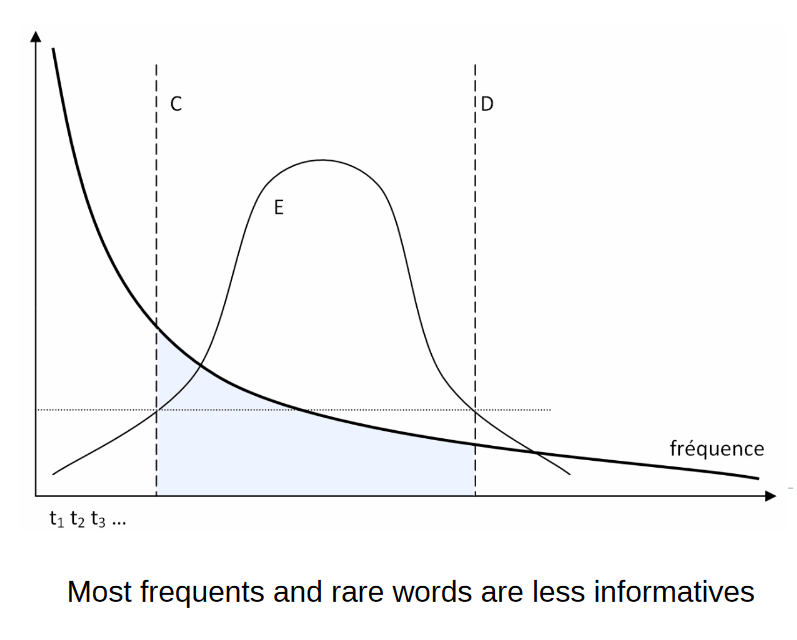

The probability mass function in Zipf's Law is defined as :

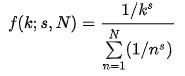

- k is the rank of the word we are interested in finding out the probability of appearing in the corpus
- N is the corpus’ vocabulary size
- s is a parameter of the probability distribution and is set to 1 in the classic version of Zipf’s Law.

Let's print the word count for each article in a dataframe

In [ ]:
def word_count(article):
  df = pd.DataFrame(columns = ['word','count','proportion']) #We create a dataframe

  list_split = article.split()
  list_word = []

  for i in list_split:
    if i not in list_word:
      list_word.append(i)
  for i in range(0,len(list_word)):
    word_name = list_word[i]
    count = list_split.count(list_word[i])
    row = [word_name, count, count/len(list_word)] 
    df = df.append(pd.DataFrame([row], columns =['word','count','proportion']), ignore_index = True)
  return df

In [ ]:
df = word_count(article1).sort_values(by='count', ascending = False, ignore_index = True)
df

,word,count,proportion
0,le,11,0.051402
1,de,11,0.051402
2,et,8,0.037383
3,Mais,6,0.028037
4,à,6,0.028037
...,...,...,...
209,!Ce,1,0.004673
210,"sûr,",1,0.004673
211,Kiara,1,0.004673
212,attend,1,0.004673


In [ ]:
def plot_word_count(df):
  df['count'].plot()

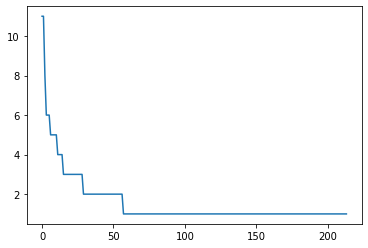

In [ ]:
plot_word_count(df)